<a href="https://colab.research.google.com/github/madachy/sd_incose/blob/master/Target_Shooter_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Target Shooter System

Run the cell below once at the beginning of each session. The output can then be cleared. There is also a method to permanently install se-lib to eliminate this step.

In [ ]:
!pip install se-lib

from selib import *

In [4]:
# target shooter system requirements

target_destruction_time = 2


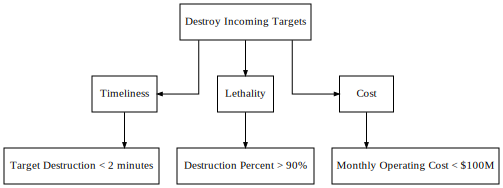

In [5]:
requirements = [("Destroy Incoming Targets", "Timeliness"),
                ("Destroy Incoming Targets", "Lethality"),
                 ("Destroy Incoming Targets", "Cost"),
                  ("Timeliness", f"Target Destruction < {target_destruction_time} minutes"),
               ("Lethality", "Destruction Percent > 90%"),
               ("Cost", "Monthly Operating Cost < $100M"),
                 ]
tree(requirements)

In [6]:
# target shooter system parameters

num_shooters = 1
weapons_technology = "High"
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

num_targets = 100

## Discrete Event Simulation Model

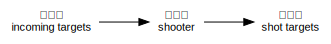

In [7]:
# target shooter system

num_shooters = 1
weapons_technology = "High"
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

init_de_model()
add_source('incoming targets',
           entity_name="target",
           num_entities = num_targets,
           connections={'shooter': 1},
           interarrival_time='np.random.exponential(3)')

add_server(name='shooter',
           connections={'shot targets': 1},
           service_time=shooting_time,
           capacity = num_shooters)

add_terminate('shot targets')

draw_model_diagram(filename="target_shooter_model_diagram", format='svg')

In [8]:
model_data, target_entity_data = run_model()
print(model_data)
print(target_entity_data)

def calculate_time_difference(simulation_output):
    time_differences = {}
    for entity, data in simulation_output.items():
        time_differences[entity] = data['departure'] - data['arrival']
    return time_differences

time_differences = calculate_time_difference(target_entity_data)
# Calculate the percentage of time differences less than 2
count = sum(1 for time in time_differences if time_differences[time] < 1.2)
percentage = count / len(time_differences) * 100

print(f'{target_entity_data =}')
# Print the percentage
print(f"The percentage of time differences less than 2 is {percentage:.2f}%")

1.827553882408511: target 1 entered from incoming targets
1.827553882408511: target 1 incoming targets -> shooter
1.827553882408511: target 1 requesting shooter resource 
1.827553882408511: target 1 granted shooter resource waiting time 0.0
1.913595921933443: target 2 entered from incoming targets
1.913595921933443: target 2 incoming targets -> shooter
1.913595921933443: target 2 requesting shooter resource 
2.538627427072653: target 1 completed using shooter resource with service time 0.7110735446641423
2.538627427072653: target 1 shooter -> shot targets
2.538627427072653: target 1 leaving system at shot targets 
2.538627427072653: target 2 granted shooter resource waiting time 0.6250315051392101
3.453286075919019: target 3 entered from incoming targets
3.453286075919019: target 3 incoming targets -> shooter
3.453286075919019: target 3 requesting shooter resource 
3.626562464841691: target 2 completed using shooter resource with service time 1.0879350377690378
3.626562464841691: targe

### Response Times

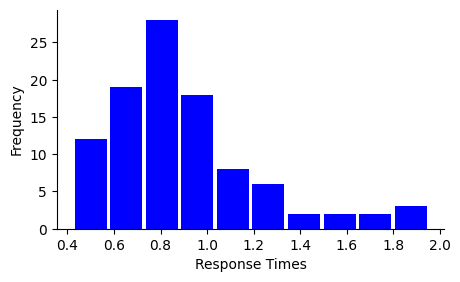

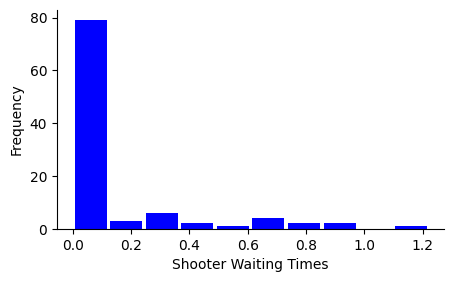

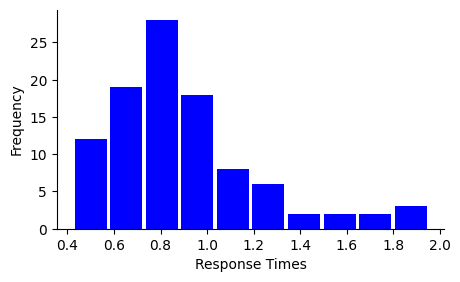

In [9]:
plot_histogram(model_data['shooter']['waiting_times'], xlabel="Shooter Waiting Times")
plot_histogram(time_differences.values(), xlabel="Response Times")

In [10]:
time_differences

{1: 0.7110735446641423,
 2: 1.7129665429082481,
 3: 1.2685642090412976,
 4: 1.0192691096576931,
 5: 1.5766023544010048,
 6: 0.9668310128374955,
 7: 0.6897603667665315,
 8: 1.14883015551111,
 9: 0.7579357647931921,
 10: 0.6812391200910888,
 11: 1.029684840559323,
 12: 1.3115462780945357,
 13: 0.592170558286476,
 14: 0.7381416953009357,
 15: 0.5796333585772331,
 16: 0.46960686061649426,
 17: 0.7504278911637172,
 18: 0.8209968970690085,
 19: 0.6317433669619774,
 20: 0.7783954951196392,
 21: 1.2585311280492846,
 22: 0.8708459125766055,
 23: 0.5843843308980183,
 24: 0.8316804305717085,
 25: 0.8926555109570273,
 26: 0.7621063023140096,
 27: 0.9339157800730788,
 28: 0.5342233502485669,
 29: 0.794648986959686,
 30: 0.9709810638303225,
 31: 1.2511642035531025,
 32: 0.9261979709010006,
 33: 0.6057363965690143,
 34: 0.8072004430222819,
 35: 1.2157432322920698,
 36: 0.8045543375403099,
 37: 1.0359281325248162,
 38: 1.0447321735322816,
 39: 0.47414550829788027,
 40: 0.4929857091605214,
 41: 0.65088

## Monte Carlo Simulation and Output Analysis

In [11]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2
mean_response_times = []

response_times_dict={}

weapons_technology = "High"

for num_shooters in [1, 2]:
    for run in range(10):
        response_times = []

        if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
        if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time='np.random.normal(1, .3)',
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]
        """
        for data in target_entity_data.values():
            response_time = data['departure'] - data['arrival']
            response_times.append(response_time)
        """

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100

        mean_response_times.append(np.mean(response_times))
        response_times_dict[num_shooters] = mean_response_times

mean_response_times
response_times_dict

{1: [2.7263886523966567,
  1.6894026134268514,
  1.082123932062477,
  1.305457635986156,
  1.4387782666394304,
  1.1653595929430556,
  1.012221580335515,
  1.3631537814571943,
  1.1295226311364535,
  1.0360133179046993,
  0.7442677261676118,
  0.9499905787966565,
  0.7477348135233453,
  1.1033532121266871,
  0.9799207040604794,
  1.0952417352160133,
  1.0278938553060326,
  1.28139796983351,
  1.1804501759534682,
  0.925635107407768],
 2: [2.7263886523966567,
  1.6894026134268514,
  1.082123932062477,
  1.305457635986156,
  1.4387782666394304,
  1.1653595929430556,
  1.012221580335515,
  1.3631537814571943,
  1.1295226311364535,
  1.0360133179046993,
  0.7442677261676118,
  0.9499905787966565,
  0.7477348135233453,
  1.1033532121266871,
  0.9799207040604794,
  1.0952417352160133,
  1.0278938553060326,
  1.28139796983351,
  1.1804501759534682,
  0.925635107407768]}

In [12]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2

response_times_dict={}


num_shooters = 1

scenarios = [{'weapons_technology': weapons_technology, 'num_shooters': num_shooters} for weapons_technology in ["Normal", "High"] for num_shooters in [1,2]]

for scenario in scenarios:
    mean_response_times = []
    response_time_goal_attainment_percent = []
    response_times_dict
    for run in range(30):
        print(scenario)
        response_times = []

        if scenario['weapons_technology'] == "High": shooting_time = 'np.random.normal(.8, .2)'
        if scenario['weapons_technology'] == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time=shooting_time,
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100
        response_time_goal_attainment_percent.append(percentage)

        mean_response_times.append(np.mean(response_times))
        response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])] = mean_response_times

response_time_goal_attainment_percent
mean_response_times
response_times_dict

{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_te

{('Normal', 1): [1.1943095568180369,
  1.1858557794855624,
  1.0646422366698427,
  1.0492313251419751,
  0.8554407078723261,
  1.1652700382350694,
  1.1070188787425612,
  1.0967603938391481,
  0.8551577382713672,
  1.0385798749800972,
  1.7368998287684996,
  1.283815041974806,
  0.9827959766512823,
  0.8915069579429172,
  1.0857821677591342,
  1.4609675769984873,
  1.482389744344302,
  1.6145322429910958,
  1.1742140529153597,
  1.149121836497913,
  1.1612257863076971,
  0.9935311740094956,
  1.1262462374308952,
  0.9308532872552767,
  1.2565387211054548,
  0.9303580459178601,
  1.5142604394354415,
  1.6528793068270702,
  1.6755539358804807,
  1.2333571569556052],
 ('Normal', 2): [1.140944018811393,
  1.4164259589604051,
  1.2666362153018853,
  1.5647813128982153,
  1.180153124342247,
  1.2849179602039515,
  1.2567832986634362,
  1.196168855960844,
  0.9254829425331368,
  0.9620863046152976,
  1.2721719487524163,
  1.459902151403234,
  1.0295808023830482,
  1.1452067636034247,
  1.2315

In [13]:
response_time_goal_attainment_percent
mean_response_times
response_times_dict

{('Normal', 1): [1.1943095568180369,
  1.1858557794855624,
  1.0646422366698427,
  1.0492313251419751,
  0.8554407078723261,
  1.1652700382350694,
  1.1070188787425612,
  1.0967603938391481,
  0.8551577382713672,
  1.0385798749800972,
  1.7368998287684996,
  1.283815041974806,
  0.9827959766512823,
  0.8915069579429172,
  1.0857821677591342,
  1.4609675769984873,
  1.482389744344302,
  1.6145322429910958,
  1.1742140529153597,
  1.149121836497913,
  1.1612257863076971,
  0.9935311740094956,
  1.1262462374308952,
  0.9308532872552767,
  1.2565387211054548,
  0.9303580459178601,
  1.5142604394354415,
  1.6528793068270702,
  1.6755539358804807,
  1.2333571569556052],
 ('Normal', 2): [1.140944018811393,
  1.4164259589604051,
  1.2666362153018853,
  1.5647813128982153,
  1.180153124342247,
  1.2849179602039515,
  1.2567832986634362,
  1.196168855960844,
  0.9254829425331368,
  0.9620863046152976,
  1.2721719487524163,
  1.459902151403234,
  1.0295808023830482,
  1.1452067636034247,
  1.2315

### Mean Response Times

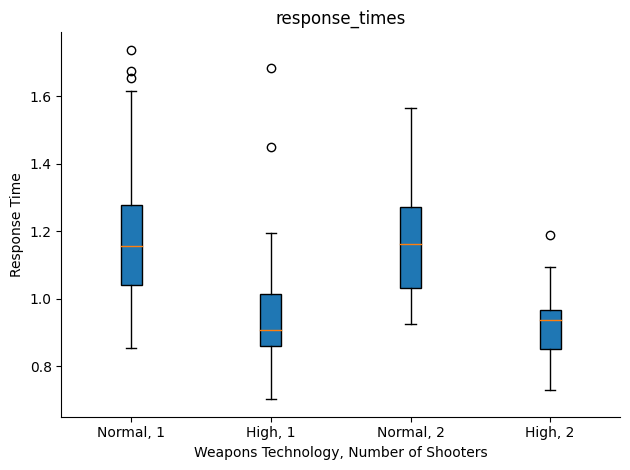

In [14]:
import matplotlib.pyplot as plt
# boxplots

#data_lists = normal_1_response_times, high_1_response_times, normal_2_response_times, high_2_response_times

data_lists = response_times_dict[('Normal', 1)], response_times_dict[('High', 1)], response_times_dict[('Normal', 2)], response_times_dict[('High', 2)]  

figure, axis1 = plt.subplots()
#axis1.set_ylim([40, 90])
axis1.set_title('response_times')
axis1.set_xlabel('Weapons Technology, Number of Shooters')
axis1.set_ylabel('Response Time')
axis1.boxplot(data_lists, widths=0.15, vert=True, patch_artist=True)
axis1.set(xticklabels = ['Normal, 1', 'High, 1', 'Normal, 2', 'High, 2'])

plt.tight_layout()
plt.show()

In [15]:
target_entity_data


{1: {'arrival': 10.228320284272783,
  'nodes': [('shooter', 10.743171145138824),
   ('shot targets', 10.743171145138824)],
  'departure': 10.743171145138824},
 2: {'arrival': 34.177717447150556,
  'nodes': [('shooter', 34.847891917445615),
   ('shot targets', 34.847891917445615)],
  'departure': 34.847891917445615},
 3: {'arrival': 40.74197742331163,
  'nodes': [('shooter', 41.56832205407445),
   ('shot targets', 41.56832205407445)],
  'departure': 41.56832205407445},
 4: {'arrival': 42.85120677391524,
  'nodes': [('shooter', 43.817877115808436),
   ('shot targets', 43.817877115808436)],
  'departure': 43.817877115808436},
 5: {'arrival': 45.38100097461364,
  'nodes': [('shooter', 46.22549876182614),
   ('shot targets', 46.22549876182614)],
  'departure': 46.22549876182614},
 6: {'arrival': 49.63440938362494,
  'nodes': [('shooter', 50.715152327136806),
   ('shot targets', 50.715152327136806)],
  'departure': 50.715152327136806},
 7: {'arrival': 51.471984110979335,
  'nodes': [('shoote

In [16]:
model_data

{'incoming targets': {'type': 'source',
  'entity_name': 'target',
  'num_entities': 10,
  'connections': {'shooter': 1},
  'interarrival_time': 'np.random.exponential(3)',
  'arrivals': [10.228320284272783,
   34.177717447150556,
   40.74197742331163,
   42.85120677391524,
   45.38100097461364,
   49.63440938362494,
   51.471984110979335,
   52.283068159214906,
   60.24564489243829,
   61.40227118353519]},
 'shooter': {'type': 'server',
  'resource': <simpy.resources.resource.Resource at 0x7f94f1edab90>,
  'connections': {'shot targets': 1},
  'service_time': 'np.random.normal(.8, .2)',
  'waiting_times': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'service_times': [0.5148508608660416,
   0.6701744702950572,
   0.8263446307628175,
   0.9666703418932,
   0.8444977872124937,
   1.080742943511868,
   0.7595253909081269,
   0.4211778057120294,
   0.6142769284555424,
   0.5956932665091029],
  'capacity': 1,
  'resource_busy_time': 7.29395442612628,
  'resource_utilization': 0.117

In [17]:
np.mean(response_times_dict[('Normal', 1)])

1.1983032016008353

### Cost Effectiveness

system_effectiveness=[0.8345133340744493, 1.038156764806274, 0.8560521428912188, 1.095714112020726]
cost_effectiveness=[0.008345133340744493, 0.006921045098708493, 0.00684841714312975, 0.006261223497261292]


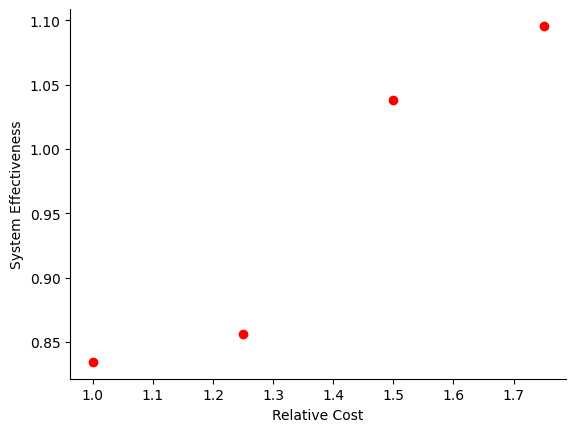

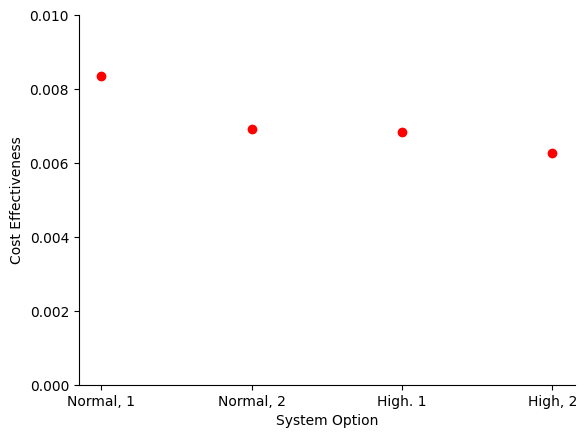

In [18]:
# interaction plots
weapon_technology = [1, 2, 1, 2] # normal, high, normal, high
number_shooters = [1, 1, 2, 2]
mean_response_time = [np.mean(response_times_dict[('Normal', 1)]), np.mean(response_times_dict[('High', 1)]), np.mean(response_times_dict[('Normal', 2)]), np.mean(response_times_dict[('High', 2)])]

system_effectiveness = [1/response_time for response_time in mean_response_time]
print(f'{system_effectiveness=}')

costs = [100, 150, 125, 175]

relative_costs = [cost/100 for cost in costs]

cost_effectiveness = [se/cost for se, cost in zip(system_effectiveness, costs)]
print(f'{cost_effectiveness=}')

import matplotlib.pyplot as plt

fig, axis = plt.subplots()
axis.scatter(relative_costs, system_effectiveness, color='red') 
axis.set(xlabel = "Relative Cost", ylabel='System Effectiveness',)
plt.show()

fig, axis = plt.subplots()
axis.scatter([1, 2, 3, 4], cost_effectiveness, color='red') 
axis.set(xlabel = "System Option", ylabel='Cost Effectiveness', ylim=(0, .01), xticks=[1, 2, 3, 4], xticklabels=["Normal, 1", "Normal, 2", "High. 1", "High, 2"]) # yticklabels=[None]*6
plt.show()